In [188]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [189]:
# get the data directory
base = os.path.abspath('.')
allpoints = os.path.join(base, "dataset/allpoints.csv")


In [190]:
df = pd.read_csv(allpoints)
df.head()

,system:index,BRIGHTI,BSI,GNDVI,NDDI,NDPI,NDVI,NDWI,RedEdge1,SRRE,SWI,count,date,dateYMD,ld_type,numbImages,timestamp,.geo
0,0_1_1_0,0.668176,0.096026,-0.288921,-21.090195,-0.237545,-0.262763,0.288921,-0.291438,0.548662,0.217778,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.37243925..."
1,0_1_1_1,0.929218,0.209793,0.074196,-0.064970,0.210968,-0.065143,-0.074196,-0.151452,0.736937,0.012774,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.27030131..."
2,0_1_1_2,0.926441,0.185817,-0.100253,2.569627,-0.150542,-0.230441,0.100253,-0.283681,0.558020,0.328992,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.27055557..."
3,0_1_1_3,0.876237,0.057851,0.164590,-2.896626,-0.079213,0.080112,-0.164590,0.000000,1.000000,0.220171,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.31101573..."
4,0_1_1_4,0.911410,-0.068030,0.055698,0.144341,-0.685248,-0.066617,-0.055698,-0.109691,0.802303,0.765603,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.32772756..."


In [191]:
# get one time stamp data
timestamps = list(set(df['date'].tolist()))
sampletime = timestamps[0]


In [192]:
def assign_int(x):
    
    if x == 'water':
        return 1
    else:
        return 0


def assign_class(x, threshold):
    
    if float(x) >= float(threshold):
        return 1
    else:
        return 0


def get_optimal(thresholds, scores):
    
    optimal_val = 0
    optimal_threshold = 0
    
    for threshold, score in zip(thresholds, scores):
        
        if score > optimal_val:
            optimal_val = score
            optimal_threshold = threshold
        
    return optimal_threshold, optimal_val

In [193]:
steps = np.linspace(-1,1,100).tolist()


In [194]:
# swi for one stime stamp
subdf = df.loc[df['date']==sampletime][['SWI', 'ld_type']]
subdf['ld_int'] = subdf['ld_type'].apply(lambda x: assign_int(x))

scores = list()
precisions = list()
recalls=list()

for step in steps:
    
    subdf['ld_reclass'] = subdf['SWI'].apply(lambda x: assign_class(x,step))
    y_true = subdf['ld_int'].tolist()
    y_pred = subdf['ld_reclass'].tolist()

    confuse=confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    precisions.append(precision)
    recalls.append(recall)

    score = accuracy_score(y_true, y_pred)
    scores.append(score)

/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

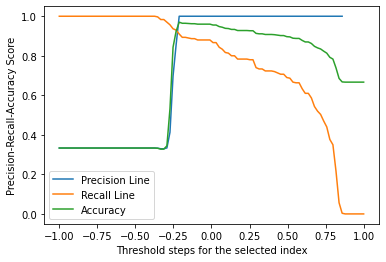

In [195]:
# plotting the precision line
plt.plot(steps, precisions, label = "Precision Line")

# plotting the recall line
plt.plot(steps, recalls, label = "Recall Line")

# plotting the recall line
plt.plot(steps, scores, label = "Accuracy")

plt.xlabel('Threshold steps for the selected index')
# Set the y axis label of the current axis.
plt.ylabel('Precision-Recall-Accuracy Score')

plt.legend()
# Display a figure.
plt.show()

In [196]:
def plotting(timestamp, steps, precisions, recalls, scores):

    # plotting the precision line
    plt.plot(steps, precisions, label = "Precision Line")

    # plotting the recall line
    plt.plot(steps, recalls, label = "Recall Line")

    # plotting the recall line
    plt.plot(steps, scores, label = "Accuracy")

    plt.xlabel('Threshold steps for the selected index')
    # Set the y axis label of the current axis.
    plt.ylabel('Precision-Recall-Accuracy Score')

    plt.legend(timestamp)
    # Display a figure.
    plt.show()

2019-09-10


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

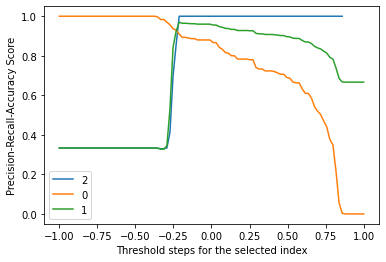

2019-02-26


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

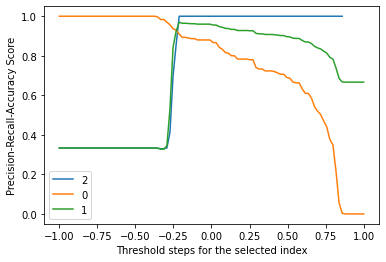

2019-09-24


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

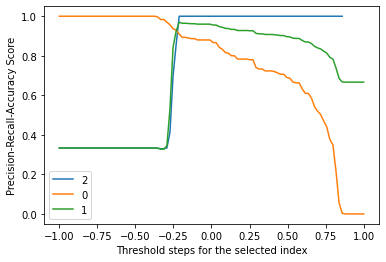

2019-08-13


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

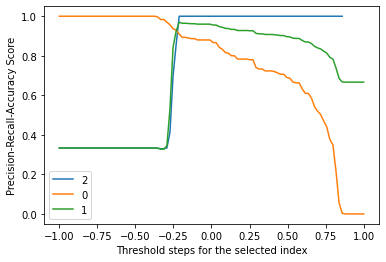

2019-07-16


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

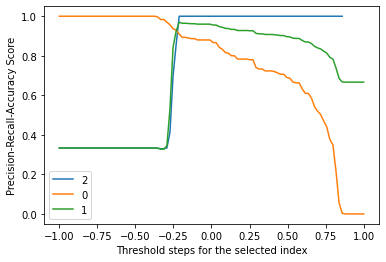

2019-10-22


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

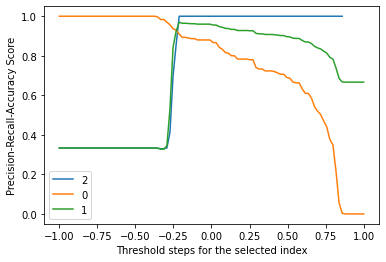

2019-01-01


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

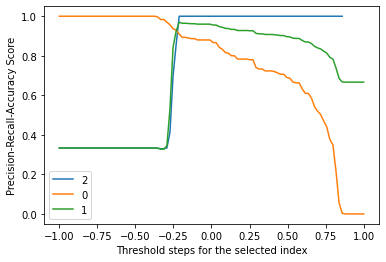

2019-12-31


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

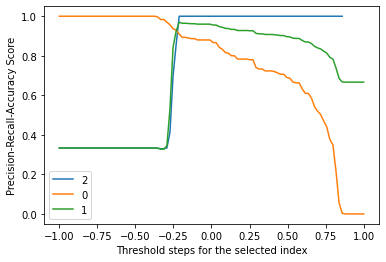

2019-04-23


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

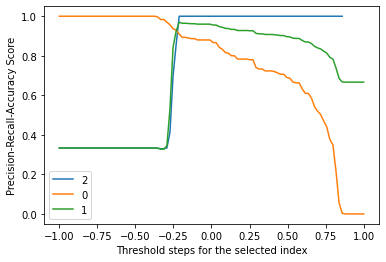

2019-11-05


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

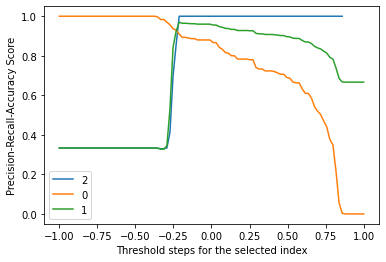

2019-05-07


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

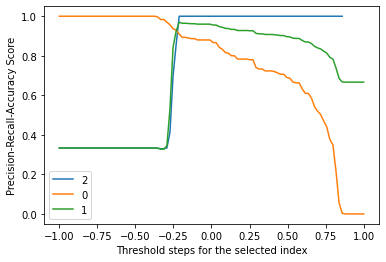

2019-11-19


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

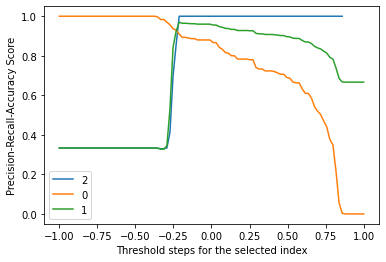

2019-08-27


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

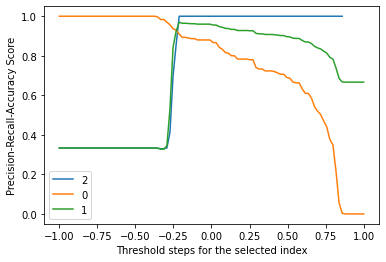

2019-06-04


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

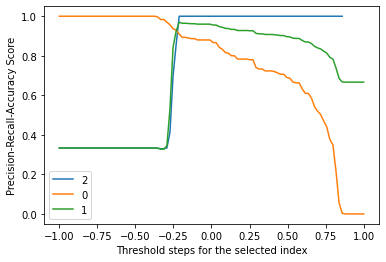

2019-07-02


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

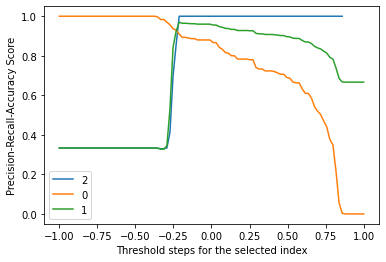

2019-01-15


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

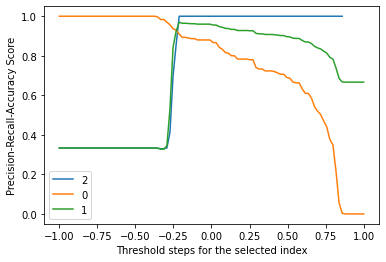

2019-02-12


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

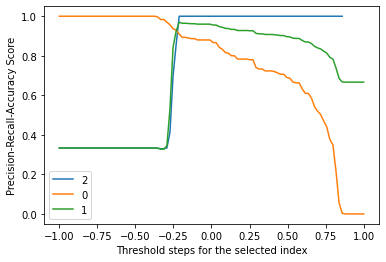

2019-10-08


/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/home/mirandalv/anaconda3/envs/tf2.1/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

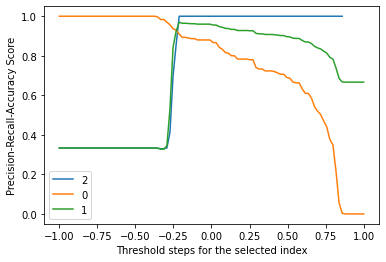

In [197]:
# Checking on the optimal threshold value for each time stamp

optimals_thre =list()
values = list()

for timestamp in timestamps:
    
    print(timestamp)
    
    scores = list()
    precisions = list()
    recalls=list()
    
    for step in steps:
    
        subdf = df.loc[df['date']==sampletime][['SWI', 'ld_type']]
        subdf['ld_int'] = subdf['ld_type'].apply(lambda x: assign_int(x))

        subdf['ld_reclass'] = subdf['SWI'].apply(lambda x: assign_class(x,step))
        y_true = subdf['ld_int'].tolist()
        y_pred = subdf['ld_reclass'].tolist()

        confuse=confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        
        precisions.append(precision)
        recalls.append(recall)

        score = accuracy_score(y_true, y_pred)
        scores.append(score)
    
    plotting(timestamp, steps, precisions, recalls, scores)

    optimal_threshold, optimal_val = get_optimal(steps, scores)
    optimals_thre.append(optimal_threshold)
    values.append(optimal_val)



In [198]:
print(optimals)

[-0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204, -0.21212121212121204]


In [199]:
print(values)

[0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]


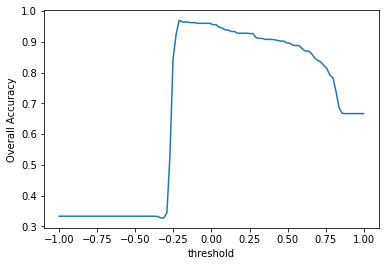

In [166]:
# plt.xlabel('threshold')
# plt.ylabel('Overall Accuracy')
# plt.plot(steps, scores)
# plt.show()

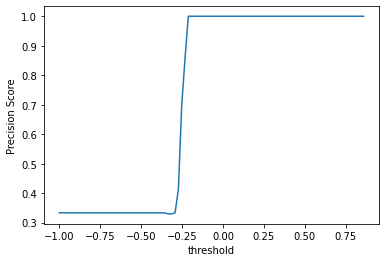

In [167]:
# plt.xlabel('threshold')
# plt.ylabel('Precision Score')
# plt.plot(steps, precisions)
# plt.show()

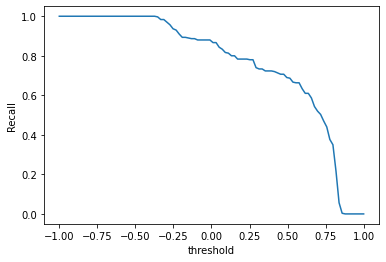

In [168]:
# plt.xlabel('threshold')
# plt.ylabel('Recall')
# plt.plot(steps, recalls)
# plt.show()

,BRIGHTI,BSI,GNDVI,NDDI,NDPI,NDVI,NDWI,RedEdge1,SRRE,SWI,ld_int
9900,0.840379,0.184124,0.278464,-5.542082,0.431965,0.187745,-0.278464,0.134740,1.311445,-0.302128,0
9901,0.870502,0.246749,-0.026585,1.515141,0.170476,-0.129799,0.026585,-0.194585,0.674221,-0.001650,0
9902,0.803181,0.041523,-0.121951,4.922222,-0.404580,-0.184136,0.121951,-0.269267,0.575712,0.524571,0
9903,0.833206,0.053873,0.194933,-3.811498,0.011552,0.113905,-0.194933,0.031420,1.064879,0.123083,0
9904,0.849192,-0.061161,-0.019627,1.430888,-0.655655,-0.110725,0.019627,-0.165444,0.716084,0.732972,0


RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1693)